<a href="https://colab.research.google.com/github/Darkred69/Real---Estate-Prediction/blob/main/Real_Estate_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/ML Timo/housing.xlsx',index_col=0)

In [ ]:
df

,Price,Area,Bedrooms,Bathrooms,Fireplaces,Age
1,142212,1982,3,1.0,0,133
2,134865,1676,3,1.5,1,14
3,118007,1694,3,2.0,1,15
4,138297,1800,2,1.0,2,49
5,129470,2088,3,1.0,1,29
...,...,...,...,...,...,...
1053,107695,1802,4,2.0,1,56
1054,236737,3239,4,3.5,2,1
1055,154829,1440,2,2.0,1,66
1056,179492,2030,3,2.5,1,3


In [ ]:
df.isnull().sum()

Price         0
Area          0
Bedrooms      0
Bathrooms     0
Fireplaces    0
Age           0
dtype: int64

In [ ]:
df.describe()

,Price,Area,Bedrooms,Bathrooms,Fireplaces,Age
count,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000
mean,167901.857143,1819.497635,3.184484,1.928571,0.624409,28.089877
std,77158.346637,662.941385,0.740486,0.650144,0.550387,34.928017
min,16858.000000,672.000000,1.000000,1.000000,0.000000,0.000000
25%,112400.000000,1342.000000,3.000000,1.500000,0.000000,6.000000
50%,152404.000000,1675.000000,3.000000,2.000000,1.000000,18.000000
75%,206512.000000,2223.000000,4.000000,2.500000,1.000000,34.000000
max,599701.000000,5228.000000,5.000000,4.500000,4.000000,247.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1057 entries, 1 to 1057
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       1057 non-null   int64  
 1   Area        1057 non-null   int64  
 2   Bedrooms    1057 non-null   int64  
 3   Bathrooms   1057 non-null   float64
 4   Fireplaces  1057 non-null   int64  
 5   Age         1057 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 57.8 KB


# Linear Regression

<AxesSubplot:>

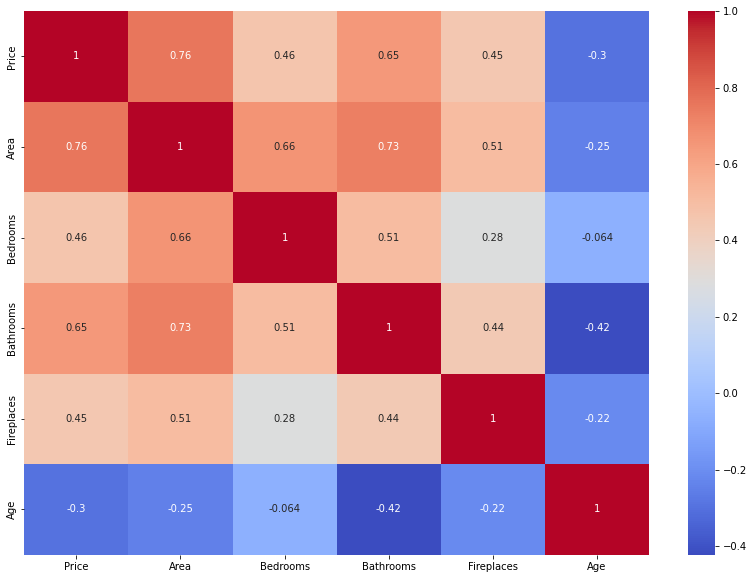

In [ ]:
#Correlation check
import seaborn as sns
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [ ]:
X_data = df.drop(["Price","Age","Bedrooms","Fireplaces"],axis=1)
y_data = df.Price
#y_data
X_data

,Area,Bathrooms
1,1982,1.0
2,1676,1.5
3,1694,2.0
4,1800,1.0
5,2088,1.0
...,...,...
1053,1802,2.0
1054,3239,3.5
1055,1440,2.0
1056,2030,2.5


In [ ]:
#Normalization using MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
scaler .fit(X_data)
data_minmax= scaler.transform(X_data)

In [ ]:
#Train test sample 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_minmax, y_data, test_size=0.8)
X_test

array([[0.21136962, 0.14285714],
       [0.28511853, 0.42857143],
       [0.22080773, 0.42857143],
       ...,
       [0.04214223, 0.14285714],
       [0.24670764, 0.42857143],
       [0.31760316, 0.42857143]])

In [32]:
#Linear Regression modal
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(X_train,y_train)



LinearRegression()

In [34]:
#Model score
model.score(X_test,y_test)

0.5736005733920365

# Support Vector Regression and it's effection comparison with Linear Regression


In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR 
import plotly.graph_objects as go # for data visualization
import plotly.express as px 

In [ ]:
# Create a scatter plot
fig = px.scatter(df, x=df['Area'], y=df['Price'], 
                 opacity=0.8, color_discrete_sequence=['black'])

In [ ]:
# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))
# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')
# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [ ]:
# ------- Select variables -------
# Note, we need X to be a 2D array, hence reshape
X=df['Area'].values.reshape(-1,1)
y=df['Price'].values

In [ ]:
# ------- Linear regression -------
model1 = LinearRegression()
lr = model1.fit(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)


In [ ]:
# ------- Support Vector regression -------
model2 = SVR(kernel='rbf', C=1000010, epsilon=10) # set kernel and hyperparameters C 
svr = model2.fit(X, y)

In [ ]:
# ------- Predict a range of values based on the models for visualization -------
# Create 100 evenly spaced points from smallest X to largest X
x_range = np.linspace(X.min(), X.max(), 100)

In [ ]:
# Predict y values for our set of X values
y_lr = model1.predict(x_range.reshape(-1, 1)) # Linear regression
y_svr = model2.predict(x_range.reshape(-1, 1)) # SVR

In [ ]:
# Create a scatter plot
fig = px.scatter(df, x=df['Area'], y=df['Price'], 
                 opacity=0.8, color_discrete_sequence=['black'])

In [ ]:
# Add a best-fit line
fig.add_traces(go.Scatter(x=x_range, y=y_lr, name='Linear Regression', line=dict(color='limegreen')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr, name='Support Vector Regression', line=dict(color='red')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr+10, name='+epsilon', line=dict(color='red', dash='dot')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr-10, name='-epsilon', line=dict(color='red', dash='dot')))
# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')